# Consumindo APIs que precisam de keys

Fonte: https://fred.stlouisfed.org/

Agora, precisamos de uma key para consumir a API. Para isso, é necessário criar uma conta no site e gerar uma key. A key é um código que identifica o usuário e permite o acesso à API. Este é um cenário muito comum, pois muitas APIs são pagas e precisam de uma key para serem consumidas. Neste caso, a API é gratuita e a key é gerada automaticamente.

>  "This product uses the FRED® API but is not endorsed or certified by the Federal Reserve Bank of St. Louis."

In [3]:
from dotenv import load_dotenv
import os

load_dotenv()

key = os.getenv("FRED_API_KEY")


In [4]:
SERIE_DOLLAR = "DEXBZUS"

URL_SERIE_DOLLAR = f"https://api.stlouisfed.org/fred/series/observations?series_id={SERIE_DOLLAR}&api_key={key}&file_type=json"


In [5]:
import requests

resposta_dollar = requests.get(URL_SERIE_DOLLAR)

resposta_dollar.status_code

200

In [6]:
import pandas as pd

df_dollar = pd.DataFrame(resposta_dollar.json()["observations"])

# drop das colunas que não serão utilizadas
df_dollar = df_dollar.drop(columns=["realtime_start", "realtime_end"])

# converter a coluna date para datetime
df_dollar["date"] = pd.to_datetime(df_dollar["date"])

# substituindo os valores "." por NaN
df_dollar["value"] = df_dollar["value"].replace(".", float("NaN"))

# converter a coluna value para float
df_dollar["value"] = df_dollar["value"].astype(float)

# colocar a coluna date como index
df_dollar = df_dollar.set_index("date")

In [7]:
df_dollar.head()

,value
date,
1995-01-02,0.844
1995-01-03,0.845
1995-01-04,0.845
1995-01-05,0.843
1995-01-06,0.840


In [8]:
df_dollar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7890 entries, 1995-01-02 to 2025-03-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   7584 non-null   float64
dtypes: float64(1)
memory usage: 123.3 KB


<Axes: xlabel='date'>

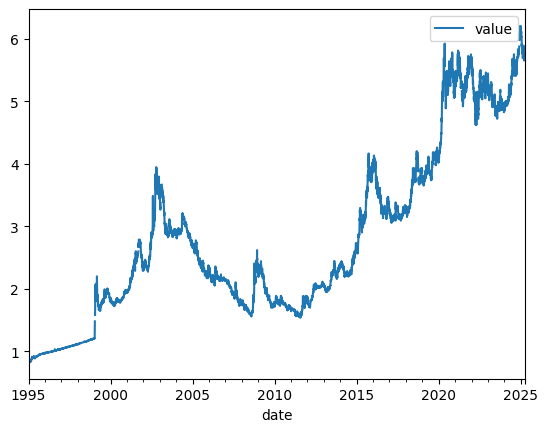

In [9]:
df_dollar.plot()

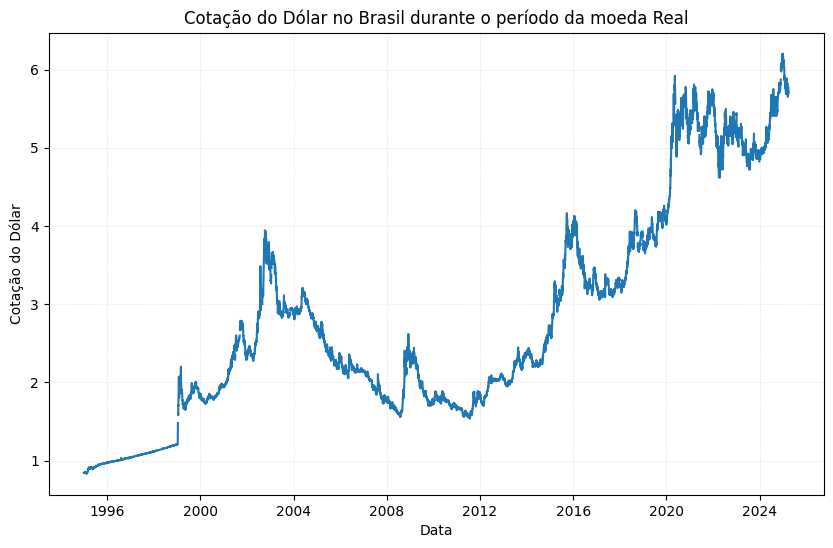

In [10]:
# criando uma figura com o matplotlib, definindo o tamanho
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# plotando o gráfico
ax.plot(df_dollar.index, df_dollar["value"])
ax.set_title("Cotação do Dólar no Brasil durante o período da moeda Real")
ax.set_ylabel("Cotação do Dólar")
ax.set_xlabel("Data")

ax.grid(linestyle="--", linewidth=0.5, color="black", alpha=0.1)

plt.show()

In [11]:
# pegando a última data do dataframe
ultima_data = df_dollar.index[-1]
ultima_data

Timestamp('2025-03-28 00:00:00')

In [15]:
# períodos dos presidentes
presidentes = {
    "FHC": ("1995-01-01", "2002-12-31"),
    "Lula 1": ("2003-01-01", "2010-12-31"),
    "Dilma": ("2011-01-01", "2016-08-31"),
    "Temer": ("2016-09-01", "2018-12-31"),
    "Bolsonaro": ("2019-01-01", "2022-12-31"),
    "Lula 2": ("2023-01-01", "2027-01-01"),
}

Matplotlib colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Matplotlib dates: https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.YearLocator

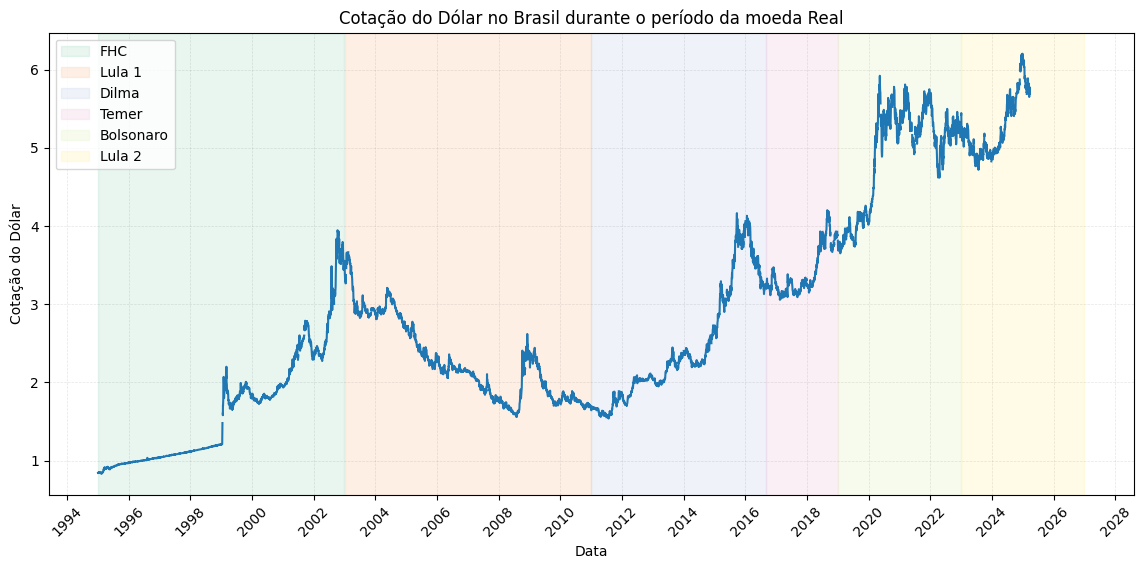

In [19]:
fig, ax = plt.subplots(figsize=(14, 6))

# plotando o gráfico
ax.plot(df_dollar.index, df_dollar["value"])
ax.set_title("Cotação do Dólar no Brasil durante o período da moeda Real")
ax.set_ylabel("Cotação do Dólar")
ax.set_xlabel("Data")

ax.grid(linestyle="--", linewidth=0.5, color="black", alpha=0.1)

# pegando as cores da paleta Pastel2 do Matplotlib
cores = plt.cm.Pastel2.colors

# criando com vspan os retângulos para cada presidente
for presidente, periodo, cor in zip(presidentes.keys(), presidentes.values(), cores):
    ax.axvspan(
        periodo[0],
        periodo[1],
        color=cor,
        alpha=0.3,
        label=presidente,
    )
    
# colocando os anos de 2 em 2 no eixo x com o ticker do matplotlib
from matplotlib.dates import YearLocator

ax.xaxis.set_major_locator(YearLocator(2))

# rotacionando os ticks do eixo x
ax.xaxis.set_tick_params(rotation=45)
    
ax.legend()

plt.show()

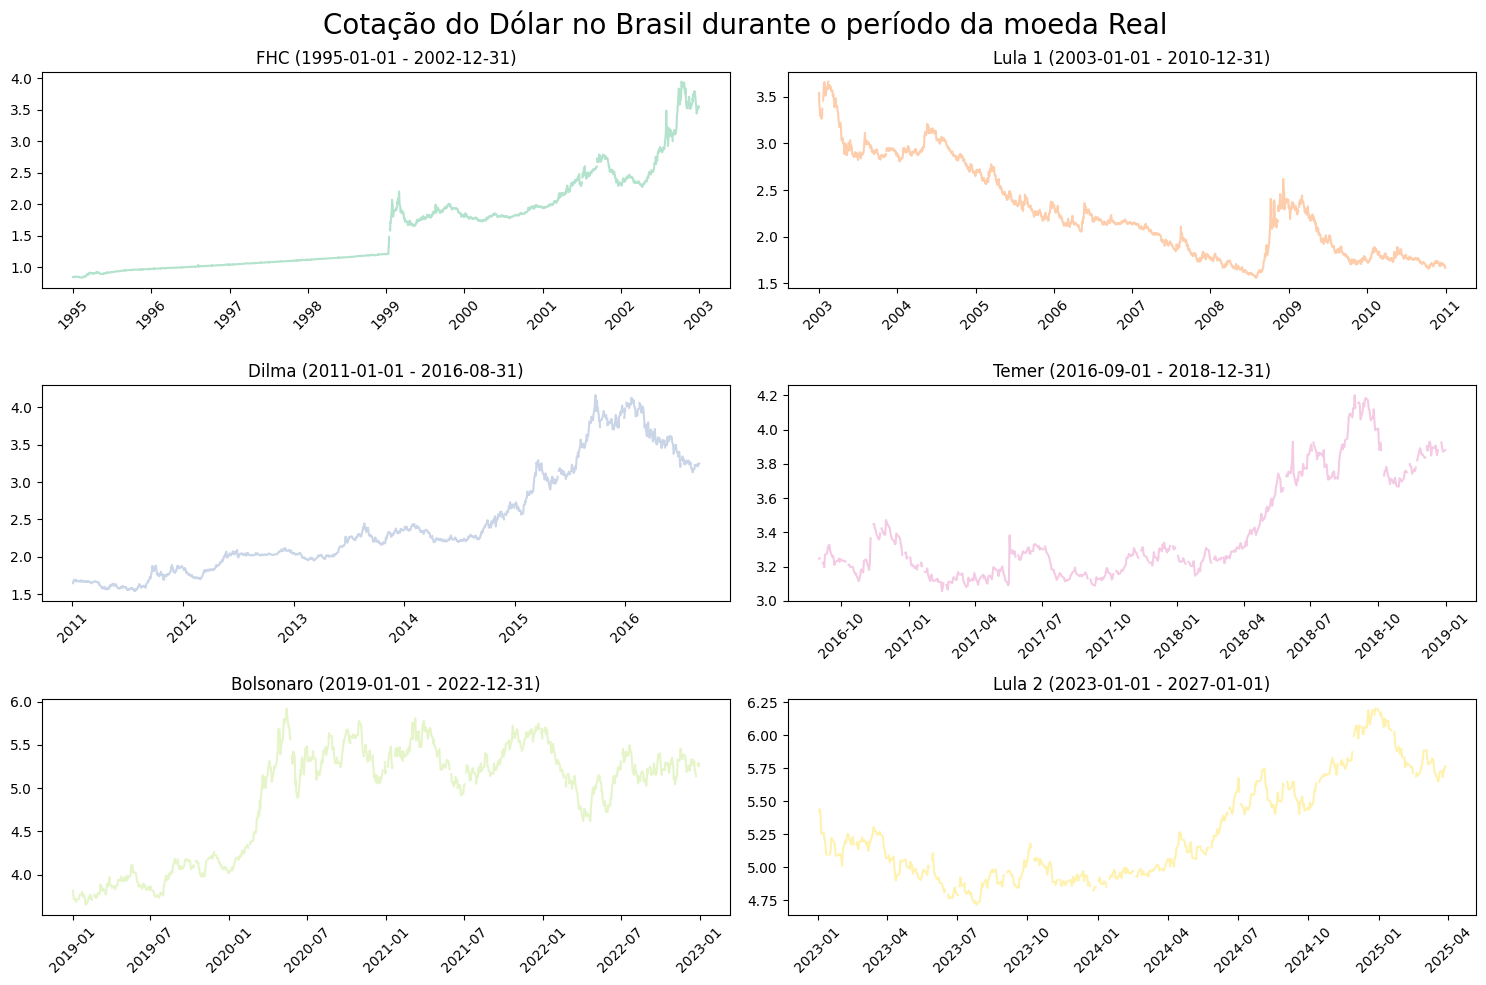

In [25]:
# criando um grid de subplots 3 x 2, ficando um subplot para cada presidente
fig, axs = plt.subplots(3, 2, figsize=(15, 10), tight_layout=True)

# iterando sobre os presidentes e os subplots
for presidente, periodo, ax, cor in zip(presidentes.keys(), presidentes.values(), axs.flatten(), cores):
    df_temp = df_dollar.loc[presidentes[presidente][0] : presidentes[presidente][1]]
    ax.plot(df_temp.index, df_temp["value"], color=cor)
    # rotacionando os ticks do eixo x
    ax.xaxis.set_tick_params(rotation=45)
    
    # colocando o título de cada subplot com o nome do presidente e o período
    ax.set_title(f"{presidente} ({periodo[0]} - {periodo[1]})")
    

fig.suptitle("Cotação do Dólar no Brasil durante o período da moeda Real", fontsize=20)

plt.show()